## **MLP Básica (Core)**

En esta actividad, implementarás una red neuronal de perceptrón multicapa (MLP) básica utilizando el dataset «Breast Cancer Wisconsin (Diagnostic)» disponible en Kaggle. Este dataset es adecuado para la clasificación binaria, donde la red MLP predecirá si un tumor es benigno o maligno basado en una serie de características.

Enlace al dataset: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data



**Objetivo:**

El objetivo de la actividad es implementar una red MLP básica con una capa oculta, entrenarla en el dataset de cáncer de mama y evaluar su rendimiento en términos de precisión y otras métricas de clasificación.

**Descripción general:**

Este conjunto de datos parece estar relacionado con el diagnóstico de cáncer, posiblemente cáncer de mama, utilizando características de células extraídas de muestras.

Cada una de las características está relacionada con la apariencia y las propiedades de las células bajo el microscopio, las cuales se usan para determinar si una muestra es benigna o maligna. La columna class representa la clasificación final, donde un valor de 1 indica que la muestra es maligna y 0 indica que es benigna

| #   | Column              | Description                                                                 |
|-----|---------------------|-----------------------------------------------------------------------------|
| 0   | id                  | Identificador único de cada instancia en el conjunto de datos.              |
| 1   | clump_thickness     | Grado de agrupamiento de las células (valores más altos indican mayor agrupación). |
| 2   | size_uniformity     | Uniformidad del tamaño de las células (valores más altos indican mayor variabilidad). |
| 3   | shape_uniformity    | Uniformidad en la forma de las células (valores más altos indican mayor variabilidad). |
| 4   | marginal_adhesion   | Grado de adhesión de las células a los bordes (valores más altos indican mayor adherencia). |
| 5   | epithelial_size     | Tamaño de las células epiteliales (valores más altos indican células más grandes). |
| 6   | bare_nucleoli       | Cantidad de nucleolos desnudos (sin membrana) observados en las células.    |
| 7   | bland_chromatin     | Calidad de la cromatina en las células (valores más altos indican cromatina más uniforme y menos densa). |
| 8   | normal_nucleoli     | Cantidad de nucleolos normales presentes en las células.                   |
| 9   | mitoses             | Número de mitosis (células en proceso de división celular).                |
| 10  | class               | Etiqueta de clasificación de la célula (1 para maligno, 0 para benigno).   |


**Instrucciones:**

**1. Carga de datos:**
* Descarga y carga el dataset desde Kaggle. Observa las características disponibles, que incluyen variables como el radio del núcleo del tumor, la textura, la suavidad, entre otras.
* Asegúrate de verificar si hay valores nulos y manejar cualquier valor atípico que pudiera estar presente.

In [1]:
import pandas as pd
import numpy as np
import time
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import plotly.express as px
from IPython.display import HTML, Image
import utils
from collections import Counter
from scipy.stats import chi2_contingency

In [2]:
# Carga los datasets
df = pd.read_csv('../data/breast-cancer-wisconsin.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [5]:
df.columns

Index(['id', 'clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
df.shape

(699, 11)

In [8]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
clump_thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
bland_chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [10]:
df.head().T

,0,1,2,3,4
id,1000025,1002945,1015425,1016277,1017023
clump_thickness,5,5,3,6,4
size_uniformity,1,4,1,8,1
shape_uniformity,1,4,1,8,1
marginal_adhesion,1,5,1,1,3
epithelial_size,2,7,2,3,2
bare_nucleoli,1,10,2,4,1
bland_chromatin,3,3,3,3,3
normal_nucleoli,1,2,1,7,1
mitoses,1,1,1,1,1


**Verificación y ajuste de tipos de datos:** Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

In [11]:
# Detectar columnas con valores únicos ['Yes', 'No']
yes_no_columns = [col for col in df.columns if sorted(df[col].dropna().unique()) == ['No', 'Yes']]
print("Columnas con valores 'Yes' y 'No':", yes_no_columns)
# Aplicar el mapeo 'Yes' -> 1 y 'No' -> 0 a todas las columnas de una vez usando map y itertools
df[yes_no_columns] = pd.DataFrame(
    map(lambda col: df[col].map({'Yes': 1, 'No': 0}), yes_no_columns)
).T.set_axis(yes_no_columns, axis=1)

Columnas con valores 'Yes' y 'No': []


**Valores nulos**

In [12]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
id,699,0,0.0
clump_thickness,699,0,0.0
size_uniformity,699,0,0.0
shape_uniformity,699,0,0.0
marginal_adhesion,699,0,0.0
epithelial_size,699,0,0.0
bare_nucleoli,699,0,0.0
bland_chromatin,699,0,0.0
normal_nucleoli,699,0,0.0
mitoses,699,0,0.0


**Valores unicos de las columnas category**

In [13]:
# Filtrar columnas de tipo 'object' o 'category'
columnas_category = df.select_dtypes(include=['object', 'category']).columns

# Iterar por cada columna y mostrar los valores únicos
for columna in columnas_category:
    print(f"Valores únicos en '{columna}':")
    print(df[columna].unique())
    print("\n")


Valores únicos en 'bare_nucleoli':
['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']




In [14]:
# Iterar sobre todas las columnas del DataFrame
for columna in df.columns:
    print(f"Valores únicos en la columna '{columna}':")
    print(df[columna].unique())
    print("\n")


Valores únicos en la columna 'id':
[ 1000025  1002945  1015425  1016277  1017023  1017122  1018099  1018561
  1033078  1035283  1036172  1041801  1043999  1044572  1047630  1048672
  1049815  1050670  1050718  1054590  1054593  1056784  1057013  1059552
  1065726  1066373  1066979  1067444  1070935  1071760  1072179  1074610
  1075123  1079304  1080185  1081791  1084584  1091262  1096800  1099510
  1100524  1102573  1103608  1103722  1105257  1105524  1106095  1106829
  1108370  1108449  1110102  1110503  1110524  1111249  1112209  1113038
  1113483  1113906  1115282  1115293  1116116  1116132  1116192  1116998
  1117152  1118039  1120559  1121732  1121919  1123061  1124651  1125035
  1126417  1131294  1132347  1133041  1133136  1136142  1137156  1143978
  1147044  1147699  1147748  1148278  1148873  1152331  1155546  1156272
  1156948  1157734  1158247  1160476  1164066  1165297  1165790  1165926
  1166630  1166654  1167439  1167471  1168359  1168736  1169049  1170419
  1170420  11717

**Detección y eliminación de valores duplicados** 

In [15]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 8


In [16]:
df = df.drop_duplicates()


In [17]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


**Consistencia en valores categóricos**

In [18]:
# Identificar columnas de tipo 'object', típicamente usadas para variables categóricas
categorical_columns = df.select_dtypes(include=['category','bool']).columns
# Crear un diccionario donde cada clave es el nombre de la columna y los valores son los valores únicos de esa columna
unique_values_dict = {col: df[col].unique() for col in categorical_columns}
# Convertir el diccionario en un DataFrame, rellenando con NaN cuando haya menos valores únicos
unique_values_df = pd.DataFrame.from_dict(unique_values_dict, orient='index').transpose()
# Mostrar el DataFrame resultante
unique_values_df.T

""


### **Detección de datos anómalos:**

Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un salario anual de 1 millón de dólares para un puesto de entrada).

In [19]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = utils.detect_outliers_iqr(df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
id,24.0,3.473227,324382.0,1371920.0
clump_thickness,0.0,0.000000,1.0,10.0
size_uniformity,0.0,0.000000,1.0,10.0
shape_uniformity,0.0,0.000000,1.0,10.0
marginal_adhesion,60.0,8.683068,1.0,8.0
epithelial_size,52.0,7.525326,1.0,7.0
bland_chromatin,20.0,2.894356,1.0,9.0
normal_nucleoli,77.0,11.143271,1.0,8.0
mitoses,119.0,17.221418,1.0,1.0
class,0.0,0.000000,2.0,4.0


In [20]:
df[numerical_columns].describe()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.910000e+02,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,1.073333e+06,4.426918,3.130246,3.201158,2.824891,3.211288,3.435601,2.882779,1.593343,2.688857
std,6.192953e+05,2.815861,3.041328,2.959886,2.866552,2.199852,2.442345,3.066298,1.723129,0.951051
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.725490e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238437e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


**2. Exploración y preprocesamiento de datos:**
* Realiza una normalización de los datos para asegurar que todas las características se encuentren en el mismo rango y mejoren el rendimiento de la red neuronal.
* Divide el dataset en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento y 20% prueba).

                 id  clump_thickness  size_uniformity  shape_uniformity  \
count  6.910000e+02       691.000000       691.000000        691.000000   
mean   1.073333e+06         4.426918         3.130246          3.201158   
std    6.192953e+05         2.815861         3.041328          2.959886   
min    6.163400e+04         1.000000         1.000000          1.000000   
25%    8.725490e+05         2.000000         1.000000          1.000000   
50%    1.171710e+06         4.000000         1.000000          1.000000   
75%    1.238437e+06         6.000000         5.000000          5.000000   
max    1.345435e+07        10.000000        10.000000         10.000000   

       marginal_adhesion  epithelial_size  bland_chromatin  normal_nucleoli  \
count         691.000000       691.000000       691.000000       691.000000   
mean            2.824891         3.211288         3.435601         2.882779   
std             2.866552         2.199852         2.442345         3.066298   
min     

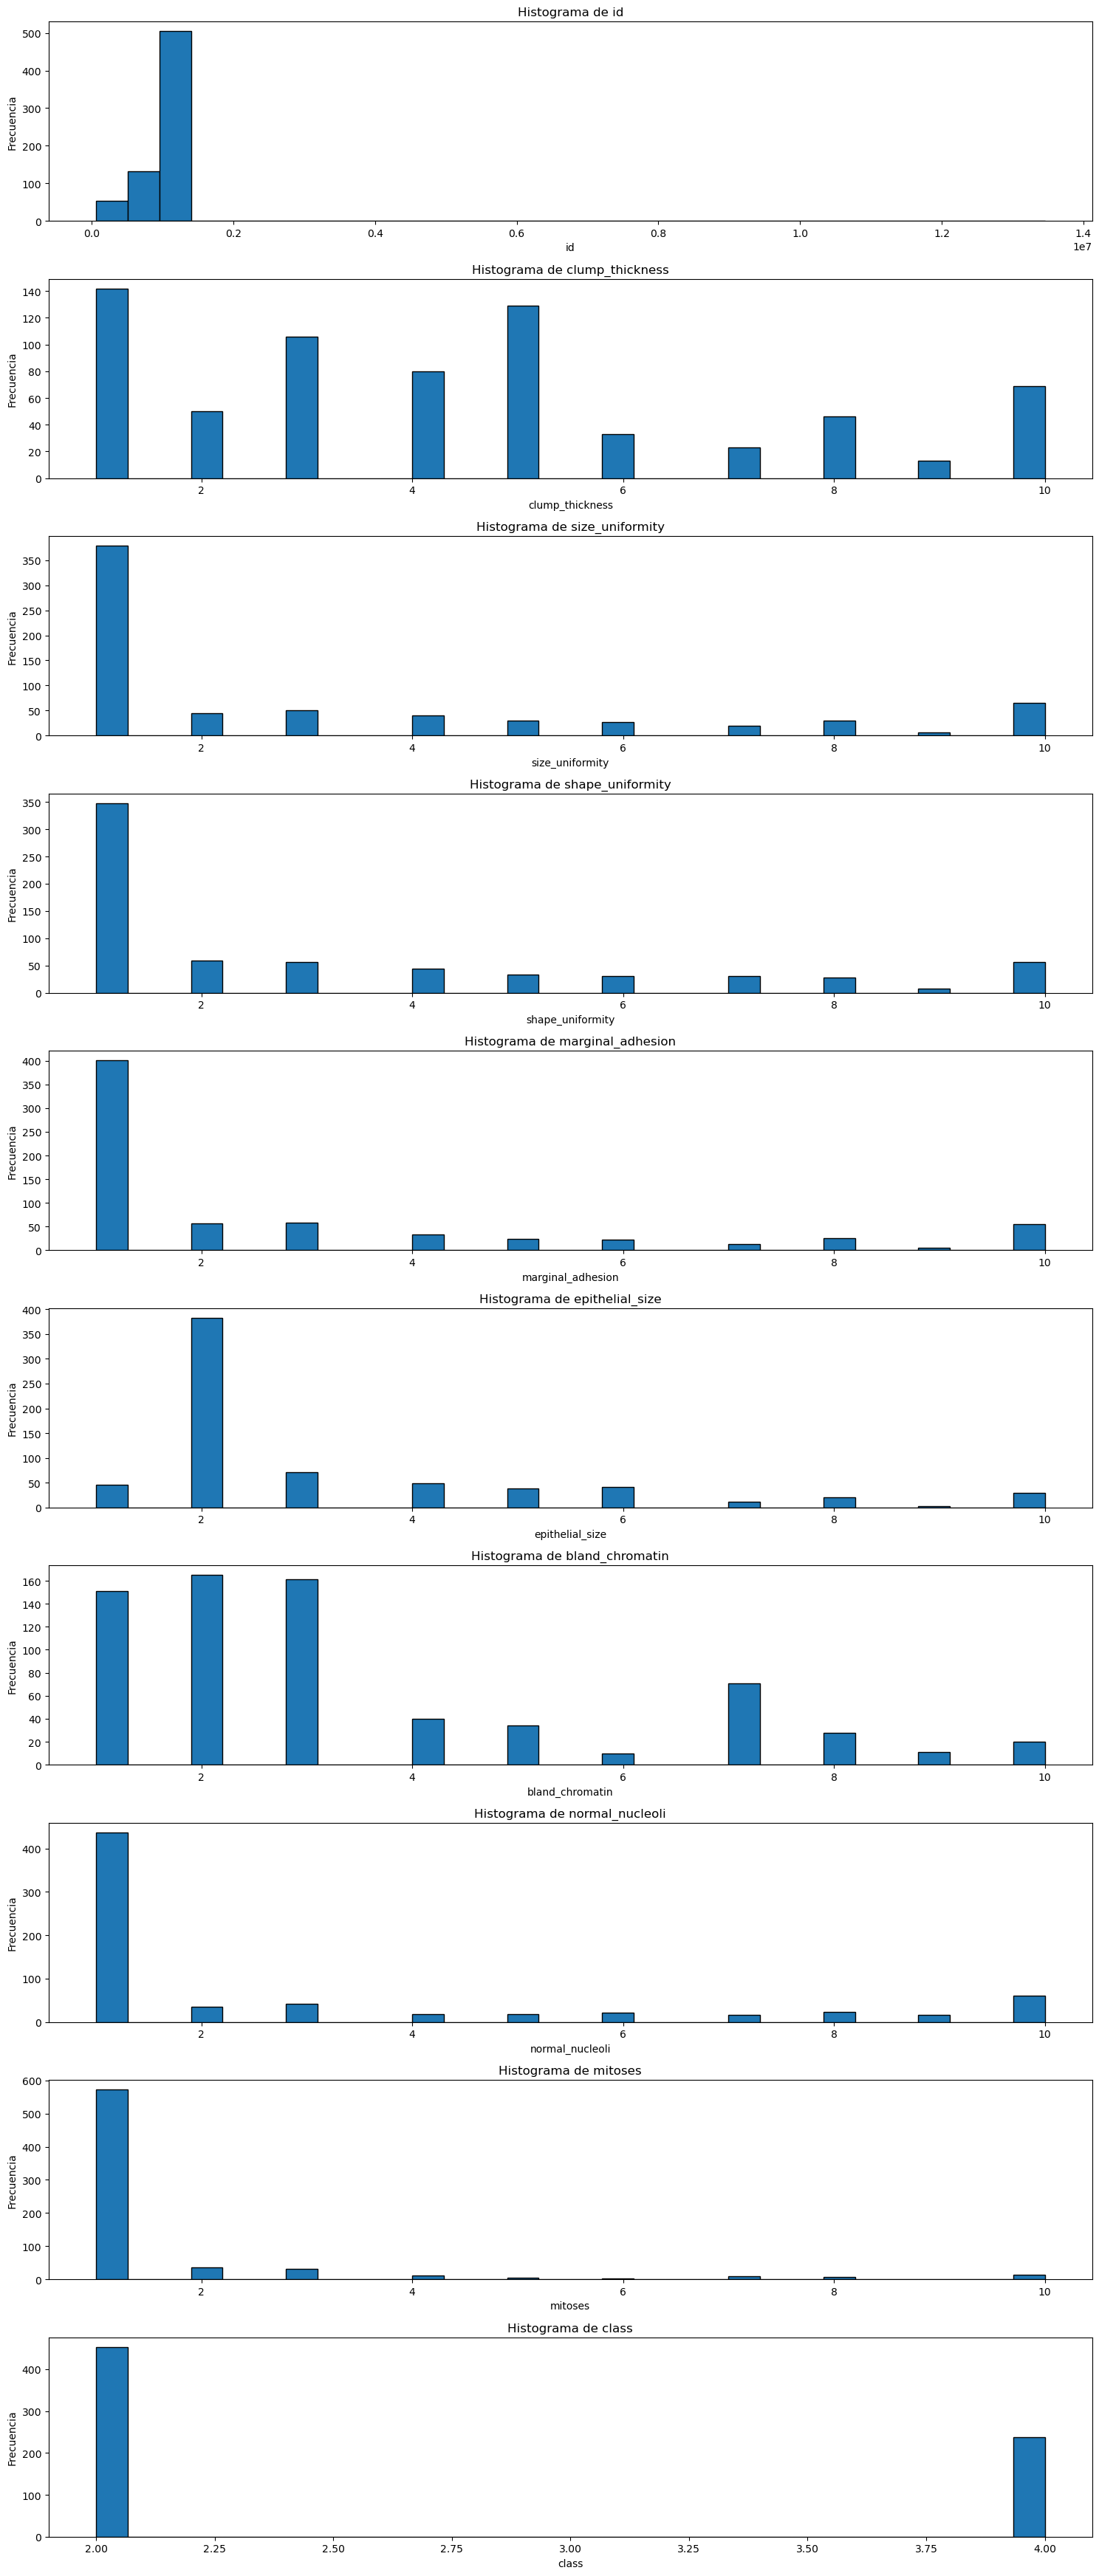

In [21]:
print(df[numerical_columns].describe())

# Configuración del tamaño de la gráfica
plt.figure(figsize=(15, 35))

# Crear un histograma para cada columna numérica
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    plt.hist(df[column].dropna(), bins=30, edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

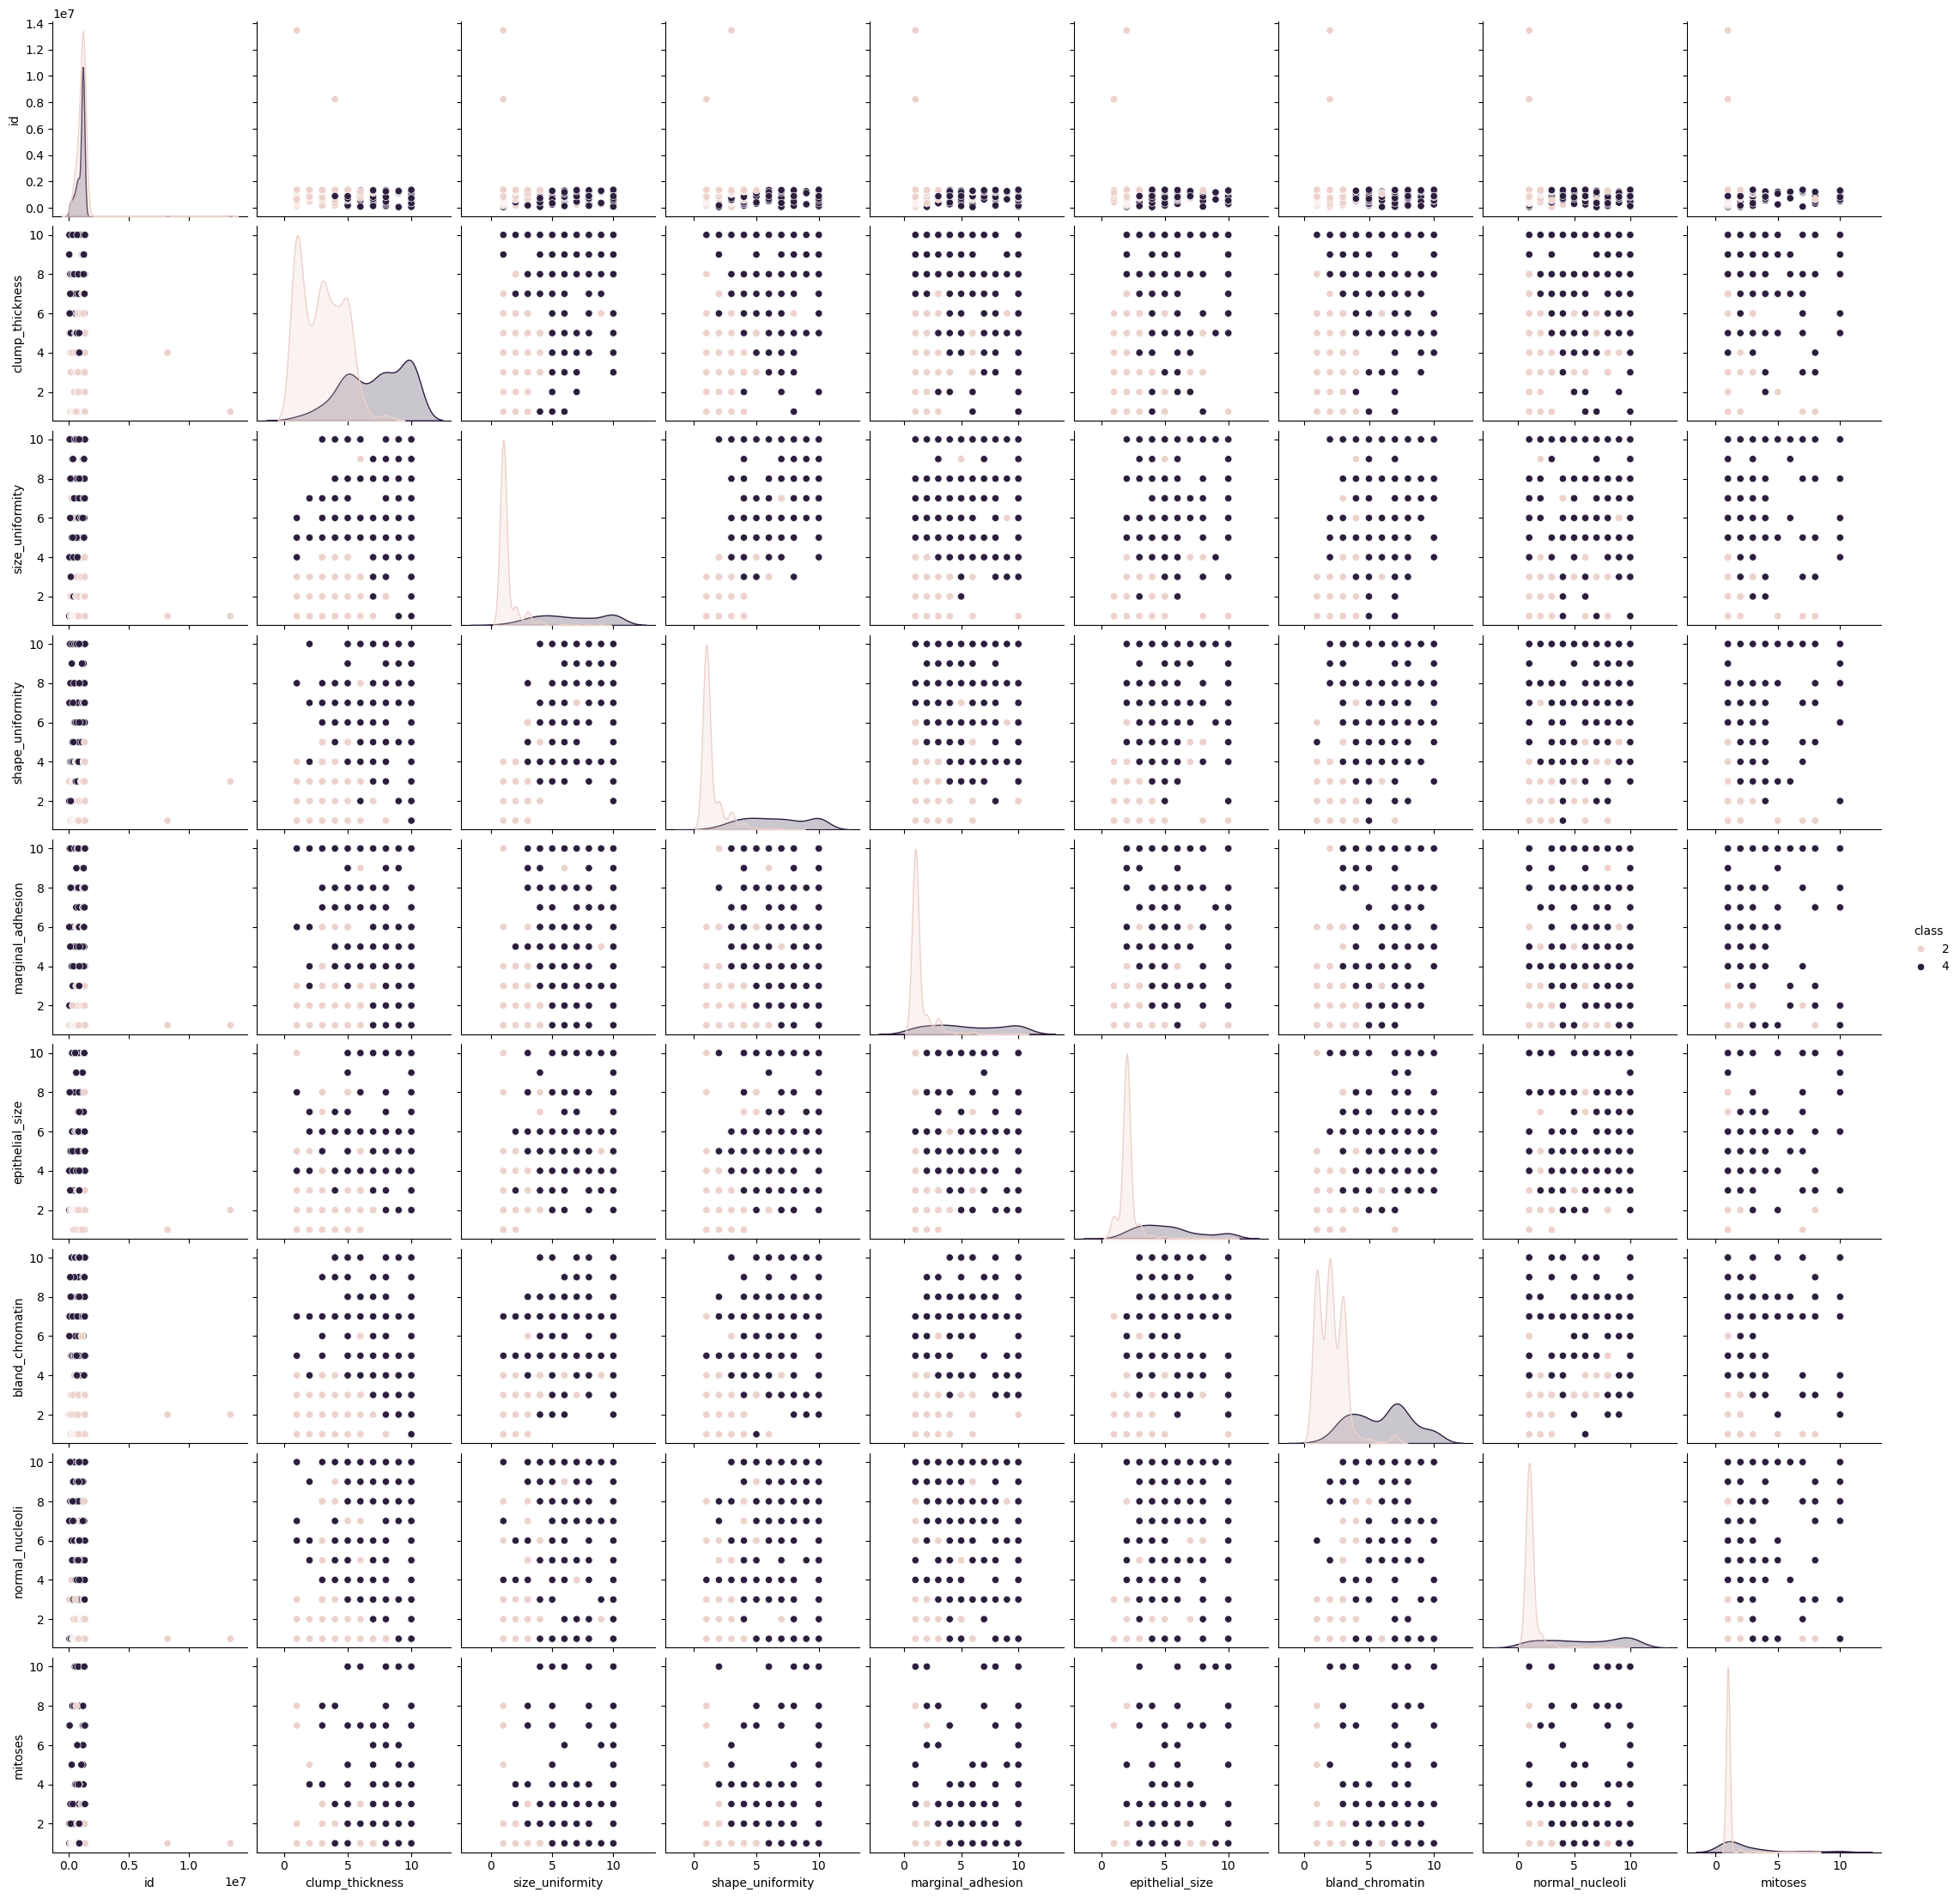

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='class', diag_kind='kde')
plt.show()


Matriz de correlación:
                         id  clump_thickness  size_uniformity  \
id                 1.000000        -0.059165        -0.043273   
clump_thickness   -0.059165         1.000000         0.643340   
size_uniformity   -0.043273         0.643340         1.000000   
shape_uniformity  -0.042184         0.653752         0.905420   
marginal_adhesion -0.066230         0.487949         0.713117   
epithelial_size   -0.047642         0.517448         0.747111   
bare_nucleoli     -0.098028         0.593936         0.689895   
bland_chromatin   -0.059645         0.561076         0.759525   
normal_nucleoli   -0.054001         0.535712         0.727239   
mitoses           -0.036001         0.350354         0.460064   
class             -0.079459         0.716938         0.817720   

                   shape_uniformity  marginal_adhesion  epithelial_size  \
id                        -0.042184          -0.066230        -0.047642   
clump_thickness            0.653752           

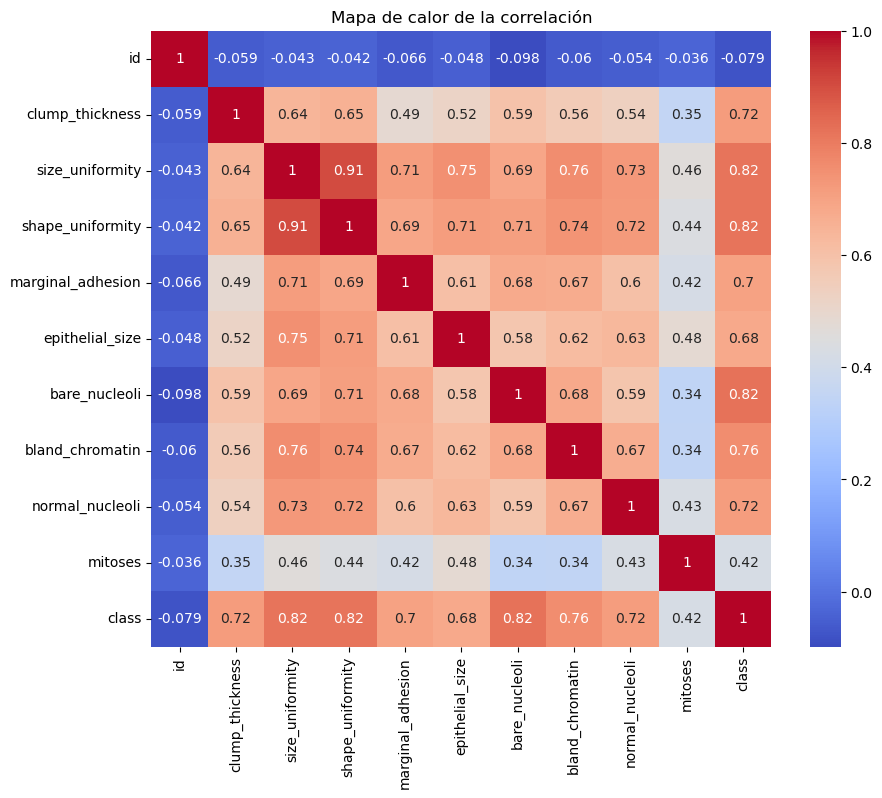

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'df' es tu DataFrame

# Reemplazar valores no numéricos como '?' por NaN
df.replace('?', np.nan, inplace=True)

# Convertir todas las columnas posibles a tipo numérico
df = df.apply(pd.to_numeric, errors='coerce')

# Calcular la matriz de correlación
correlacion = df.corr()

# Imprimir la matriz de correlación
print("Matriz de correlación:")
print(correlacion)

# Opcional: Crear un mapa de calor para visualizar la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de la correlación')
plt.show()



### Conclusión

La matriz de correlación indica que las variables relacionadas con las características celulares, como **`size_uniformity`** (uniformidad del tamaño), **`shape_uniformity`** (uniformidad de la forma), y **`bare_nucleoli`** (núcleos desnudos), tienen relaciones muy fuertes entre sí, lo que sugiere que estas características están estrechamente asociadas y probablemente influyen en la clasificación final de las células.

En particular:
- **`class`** (la clasificación de la célula) muestra correlaciones elevadas con **`bare_nucleoli`** (0.82), **`size_uniformity`** (0.82), y **`shape_uniformity`** (0.82). Esto sugiere que estas tres variables son cruciales para determinar si la célula pertenece a una clase específica (por ejemplo, benigno o maligno).
- **`bland_chromatin`** (cromatina homogénea) también tiene una correlación significativa con la **`class`** (0.76), lo que refuerza la importancia de las características cromosómicas en la clasificación celular.

La variable **`id`**, como se esperaba, no muestra ninguna correlación significativa con las demás variables, lo que indica que se trata de un identificador único sin impacto en los análisis de correlación.

### Implicaciones:
Para un modelo predictivo o un análisis más detallado, es importante centrarse en las variables con alta correlación con la **`class`**. Estas incluyen **`bare_nucleoli`**, **`size_uniformity`**, y **`shape_uniformity`**, que son probablemente las más influyentes en la clasificación de las células. Cualquier análisis o modelo futuro debería enfocarse en estas variables para obtener predicciones más precisas y efectivas.

En resumen, las características de la célula relacionadas con su forma, tamaño y cromatina juegan un papel clave en su clasificación, y pueden servir como las principales variables predictivas en un modelo de diagnóstico.


**2. Exploración y preprocesamiento de datos:**
* Realiza una normalización de los datos para asegurar que todas las características se encuentren en el mismo rango y mejoren el rendimiento de la red neuronal.
* Divide el dataset en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento y 20% prueba).

In [26]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Crear un DataFrame de ejemplo o cargar tu DataFrame
# df = pd.read_csv('path_to_your_data.csv')  # Si necesitas cargar tu DataFrame

# Seleccionar las columnas numéricas
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Imputar los valores faltantes (usando la media en este caso)
imputer = SimpleImputer(strategy='mean')  # Puedes cambiar 'mean' por 'median' o 'most_frequent'
df[columnas_numericas] = imputer.fit_transform(df[columnas_numericas])

# Inicializar el escalador
scaler = StandardScaler()

# Aplicar la normalización (escalado) a las columnas numéricas
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])

# Verifica los primeros registros del DataFrame normalizado
print(df.head())


         id  clump_thickness  size_uniformity  shape_uniformity  \
0 -0.118460         0.203667        -0.700940         -0.744202   
1 -0.113741         0.203667         0.286185          0.270085   
2 -0.093575        -0.507110        -0.700940         -0.744202   
3 -0.092198         0.559055         1.602353          1.622467   
4 -0.090992        -0.151722        -0.700940         -0.744202   

   marginal_adhesion  epithelial_size  bare_nucleoli  bland_chromatin  \
0          -0.637077        -0.551021      -0.706343        -0.178483   
1           0.759339         1.723505       1.798638        -0.178483   
2          -0.637077        -0.551021      -0.428011        -0.178483   
3          -0.637077        -0.096116       0.128651        -0.178483   
4           0.061131        -0.551021      -0.706343        -0.178483   

   normal_nucleoli  mitoses     class  
0        -0.614468 -0.34459 -0.724835  
1        -0.288106 -0.34459 -0.724835  
2        -0.614468 -0.34459 -0.724835 

**División del dataset en conjuntos de entrenamiento y prueba**

In [28]:
from sklearn.model_selection import train_test_split

# Seleccionar las características (X) y la variable objetivo (y)
X = df.drop(columns=['class', 'id'])  # Características (sin la columna 'class' ni 'id')
y = df['class']  # Variable objetivo

# Dividir el dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifica las formas de los conjuntos resultantes
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")


Tamaño de X_train: (552, 9)
Tamaño de X_test: (139, 9)


**Implementación de la MLP:**
* Implementa una red MLP utilizando Keras o cualquier otra biblioteca de deep learning. La red debe tener una capa de entrada que coincida con el número de características del dataset, una capa oculta con al menos 32 neuronas y una capa de salida con una única neurona usando la función de activación sigmoide para la clasificación binaria.
* Utiliza la función de pérdida binaria (binary_crossentropy) y el optimizador Adam.


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Crear el modelo secuencial
modelo = Sequential()

# Capa de entrada (que coincide con el número de características en el dataset)
modelo.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # 64 neuronas en la capa oculta

# Capa oculta con 32 neuronas
modelo.add(Dense(32, activation='relu'))

# Capa de salida con una sola neurona (clasificación binaria) y activación sigmoide
modelo.add(Dense(1, activation='sigmoid'))

# Compilar el modelo con la función de pérdida binaria y el optimizador Adam
modelo.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Entrenamiento del modelo
history = modelo.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = modelo.evaluate(X_test, y_test)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


Epoch 1/20
18/18 [==============================] - 3s 63ms/step - loss: 0.4547 - accuracy: 0.0000e+00 - val_loss: 0.1713 - val_accuracy: 0.0000e+00
Epoch 2/20
18/18 [==============================] - 0s 21ms/step - loss: -0.1506 - accuracy: 0.0000e+00 - val_loss: -0.4247 - val_accuracy: 0.0000e+00
Epoch 3/20
18/18 [==============================] - 0s 9ms/step - loss: -0.8592 - accuracy: 0.0000e+00 - val_loss: -1.2838 - val_accuracy: 0.0000e+00
Epoch 4/20
18/18 [==============================] - 0s 9ms/step - loss: -1.9053 - accuracy: 0.0000e+00 - val_loss: -2.5470 - val_accuracy: 0.0000e+00
Epoch 5/20
18/18 [==============================] - 0s 10ms/step - loss: -3.5027 - accuracy: 0.0000e+00 - val_loss: -4.5489 - val_accuracy: 0.0000e+00
Epoch 6/20
18/18 [==============================] - 0s 9ms/step - loss: -6.0815 - accuracy: 0.0000e+00 - val_loss: -7.7556 - val_accuracy: 0.0000e+00
Epoch 7/20
18/18 [==============================] - 0s 9ms/step - loss: -10.1269 - accuracy: 0.0000

**Visualización del desempeño del modelo**

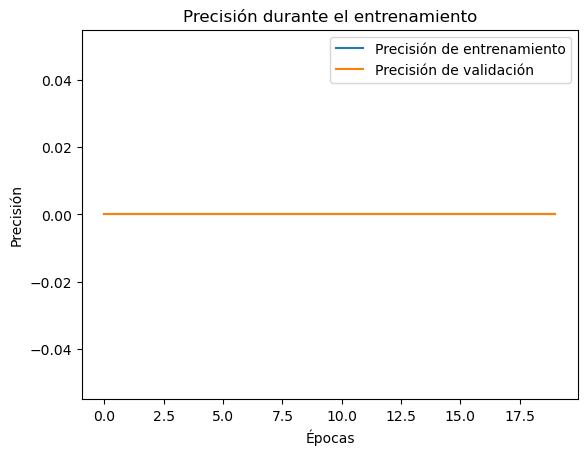

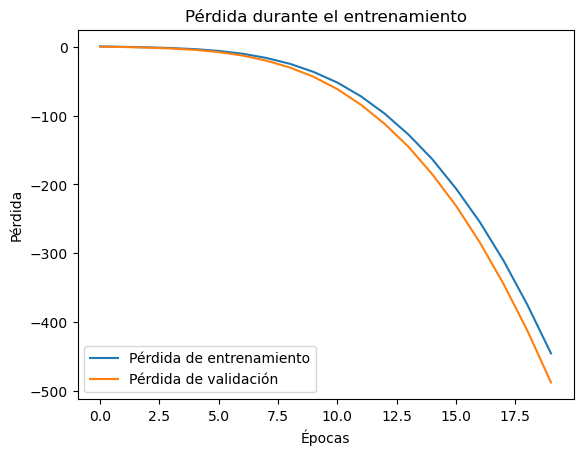

In [30]:
import matplotlib.pyplot as plt

# Graficar la precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


**Entrenamiento del modelo:**
* Entrena la red en el conjunto de entrenamiento durante al menos 50 épocas. Asegúrate de monitorizar la pérdida y la precisión tanto en el conjunto de entrenamiento como en el conjunto de validación.
* Visualiza las curvas de aprendizaje que muestran cómo evolucionan la pérdida y la precisión durante el entrenamiento.

**Entrenamiento del modelo (50 épocas)**

In [31]:
# Entrenamiento del modelo durante 50 épocas
history = modelo.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_test, y_test))

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = modelo.evaluate(X_test, y_test)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


Epoch 1/50
18/18 [==============================] - 1s 28ms/step - loss: -525.3478 - accuracy: 0.0000e+00 - val_loss: -573.8810 - val_accuracy: 0.0000e+00
Epoch 2/50
18/18 [==============================] - 0s 9ms/step - loss: -614.6012 - accuracy: 0.0000e+00 - val_loss: -668.2551 - val_accuracy: 0.0000e+00
Epoch 3/50
18/18 [==============================] - 0s 10ms/step - loss: -712.8669 - accuracy: 0.0000e+00 - val_loss: -772.3774 - val_accuracy: 0.0000e+00
Epoch 4/50
18/18 [==============================] - 0s 9ms/step - loss: -820.5514 - accuracy: 0.0000e+00 - val_loss: -886.6594 - val_accuracy: 0.0000e+00
Epoch 5/50
18/18 [==============================] - 0s 9ms/step - loss: -938.5303 - accuracy: 0.0000e+00 - val_loss: -1010.4400 - val_accuracy: 0.0000e+00
Epoch 6/50
18/18 [==============================] - 0s 10ms/step - loss: -1065.7748 - accuracy: 0.0000e+00 - val_loss: -1143.3889 - val_accuracy: 0.0000e+00
Epoch 7/50
18/18 [==============================] - 0s 9ms/step - loss

**Visualización de las curvas de aprendizaje**

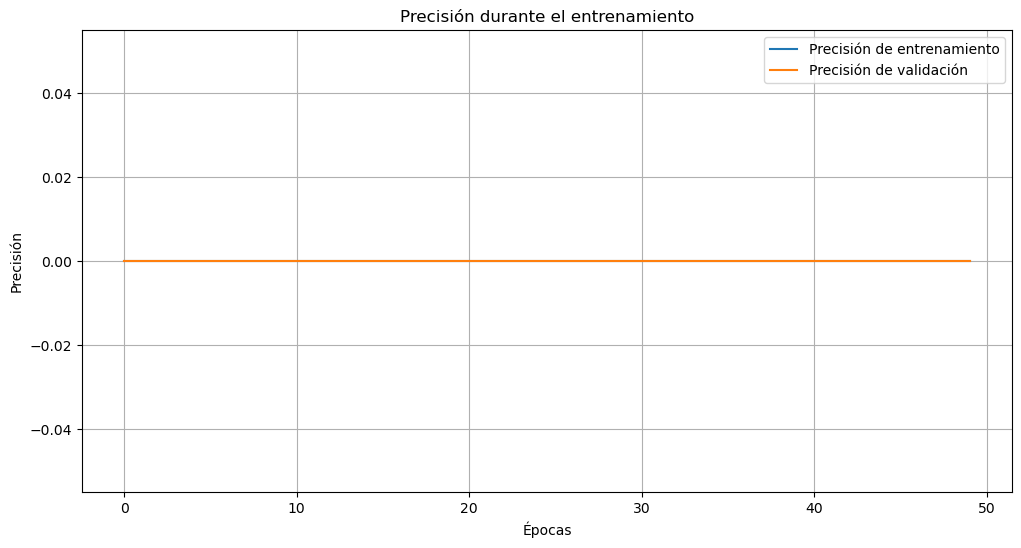

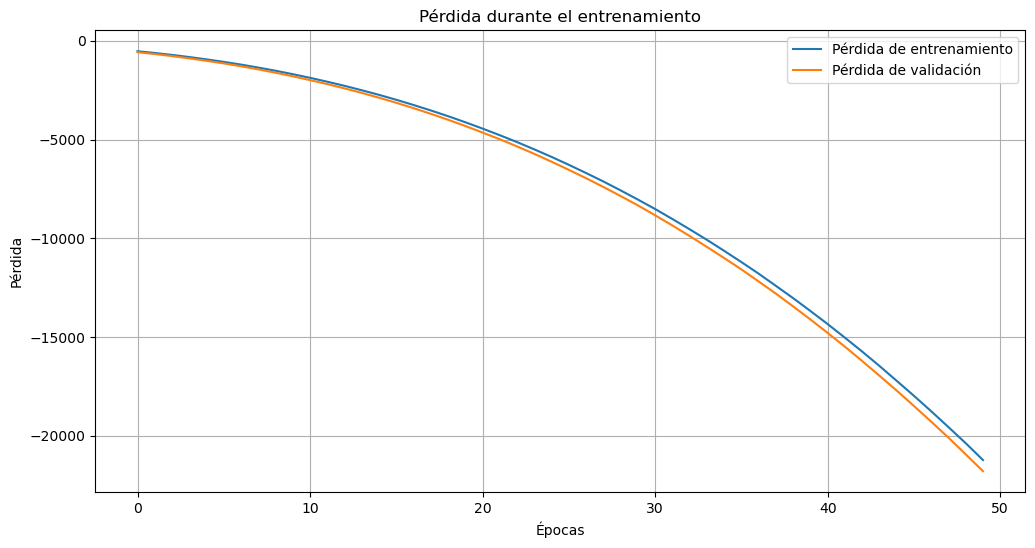

In [32]:
import matplotlib.pyplot as plt

# Graficar la precisión durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la pérdida durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()


**Evaluación del modelo:**
* Evalúa el modelo en el conjunto de prueba utilizando métricas como la precisión, el recall, la F1-score y la matriz de confusión.
* Discute si la red MLP básica es adecuada para este tipo de datos y cómo podría mejorarse.

5/5 [==============================] - 0s 3ms/step
Primeras filas de y_test: [1 0 1 1 0 0 0 0 0 1]
Primeras filas de y_pred: [[1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        98
           1       0.93      0.95      0.94        41

    accuracy                           0.96       139
   macro avg       0.95      0.96      0.96       139
weighted avg       0.96      0.96      0.96       139



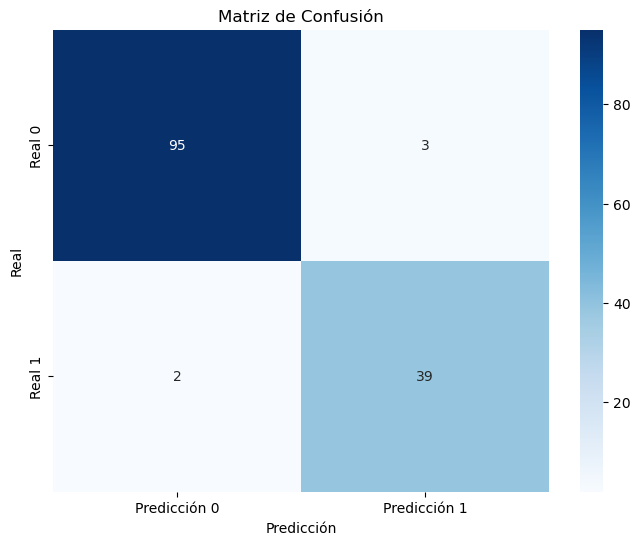

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Verificar si las predicciones son probabilidades (probablemente lo sean si usas una red neuronal)
if y_pred.shape[1] == 1:  # Esto es común para modelos de clasificación binaria
    y_pred = (y_pred > 0.5).astype(int)  # Convertir en 0 o 1
else:
    # Si el modelo tiene más de dos clases, selecciona la clase con mayor probabilidad
    y_pred = np.argmax(y_pred, axis=1)

# Asegúrate de que y_test tenga las mismas dimensiones y tipo de datos
y_test = np.array(y_test)  # Convertir a array de numpy si no lo está

# Si y_test es continuo, lo convertimos a binario, en el caso de ser clasificación binaria
if np.unique(y_test).size > 2:
    print("y_test contiene más de dos clases. Asegúrate de que sea binario.")
else:
    # Convertir y_test a binario si es necesario
    y_test = (y_test > 0.5).astype(int)  # Si las etiquetas son continuas

# Verificar las primeras filas de y_test y y_pred
print("Primeras filas de y_test:", y_test[:10])
print("Primeras filas de y_pred:", y_pred[:10])

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred)
print(report)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicción 0', 'Predicción 1'], yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


5/5 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        98
           1       0.93      0.95      0.94        41

    accuracy                           0.96       139
   macro avg       0.95      0.96      0.96       139
weighted avg       0.96      0.96      0.96       139



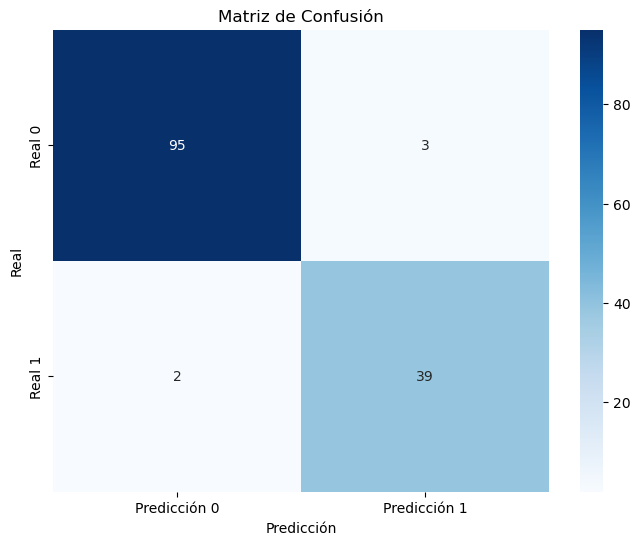

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)
y_pred = (y_pred > 0.5)  # Convertir las probabilidades en 0 o 1

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred)
print(report)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicción 0', 'Predicción 1'], yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


In [36]:
import numpy as np
from sklearn.metrics import classification_report

# Suponiendo que ya tienes los valores de y_test y y_pred
# Convierte las predicciones a valores binarios (0 o 1)
y_pred = (y_pred > 0.5).astype(int)  # Convierte las probabilidades a clases binarias

# Convierte y_test a enteros (0 o 1) si es necesario
y_test = y_test.astype(int)

# Imprime las primeras filas para verificar
print(f"y_test: {y_test[:10]}")
print(f"y_pred: {y_pred[:10]}")

# Genera el reporte de clasificación
report = classification_report(y_test, y_pred)
print(report)


y_test: [1 0 1 1 0 0 0 0 0 1]
y_pred: [[1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        98
           1       0.93      0.95      0.94        41

    accuracy                           0.96       139
   macro avg       0.95      0.96      0.96       139
weighted avg       0.96      0.96      0.96       139



**Conclusión:**

El modelo tiene un buen rendimiento general, con una exactitud del 96% y altos valores de precisión, recall y F1-score para ambas clases.
* Clase 0 tiene una mayor representación en el conjunto de prueba, lo que puede explicar sus métricas ligeramente mejores en comparación con la Clase 1, pero en general, el modelo es sólido y tiene un buen balance.
* F1-score alto para ambas clases, lo que indica que el modelo está equilibrado en cuanto a detectar tanto la clase 0 como la clase 1 sin perder demasiado en ninguna de ellas.
Este tipo de reporte es útil para comprender si el modelo es eficaz y equilibrado, especialmente cuando las clases tienen diferentes frecuencias.

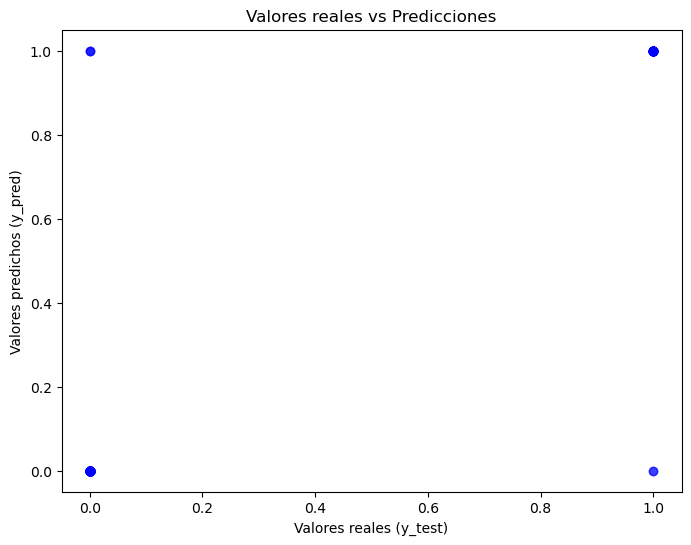

In [37]:
import matplotlib.pyplot as plt

# Gráfico de dispersión de los valores reales vs los predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.title('Valores reales vs Predicciones')
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Valores predichos (y_pred)')
plt.show()


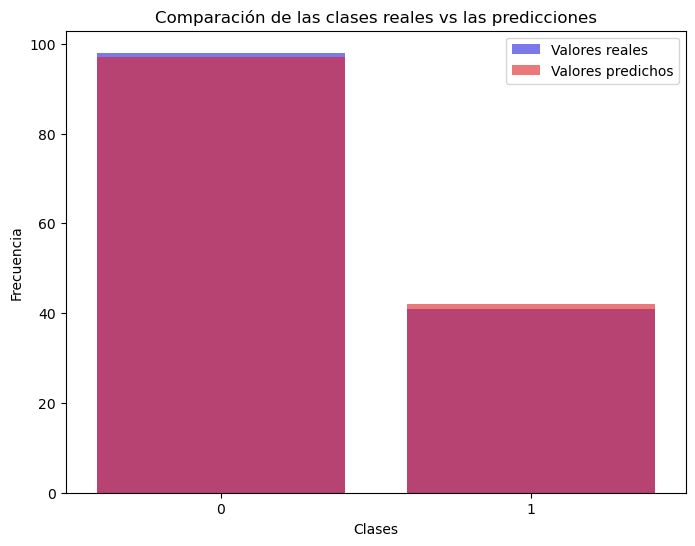

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que tanto y_test como y_pred sean unidimensionales
y_test = y_test.flatten()  # Convierte y_test en un array unidimensional
y_pred = y_pred.flatten()  # Convierte y_pred en un array unidimensional

# Gráfico de barras para comparar las clases reales y las predicciones
plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, label='Valores reales', color='blue', alpha=0.6)
sns.countplot(x=y_pred, label='Valores predichos', color='red', alpha=0.6)
plt.title('Comparación de las clases reales vs las predicciones')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


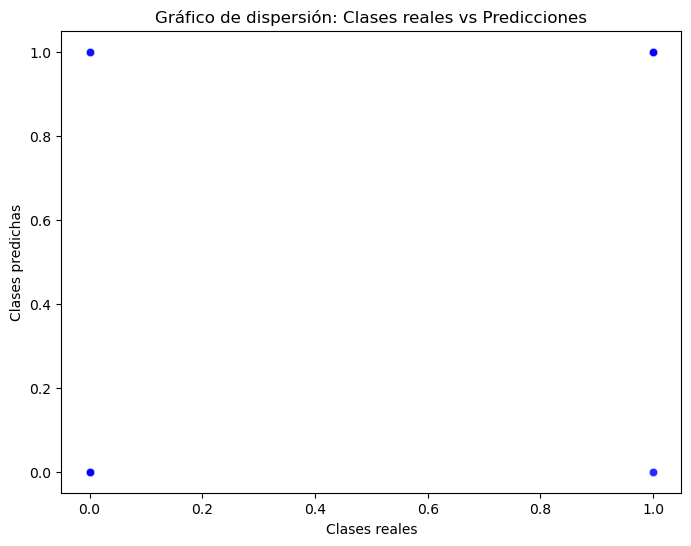

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que tanto y_test como y_pred sean unidimensionales
y_test = y_test.flatten()
y_pred = y_pred.flatten()

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.title('Gráfico de dispersión: Clases reales vs Predicciones')
plt.xlabel('Clases reales')
plt.ylabel('Clases predichas')
plt.show()


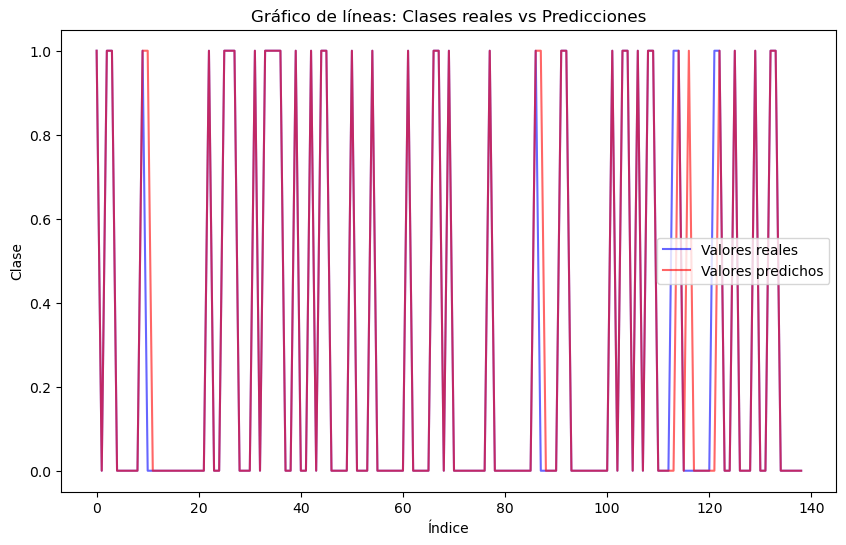

In [41]:
import matplotlib.pyplot as plt

# Asegúrate de que tanto y_test como y_pred sean unidimensionales
y_test = y_test.flatten()
y_pred = y_pred.flatten()

# Gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Valores reales', color='blue', alpha=0.6)
plt.plot(y_pred, label='Valores predichos', color='red', alpha=0.6)
plt.title('Gráfico de líneas: Clases reales vs Predicciones')
plt.xlabel('Índice')
plt.ylabel('Clase')
plt.legend()
plt.show()


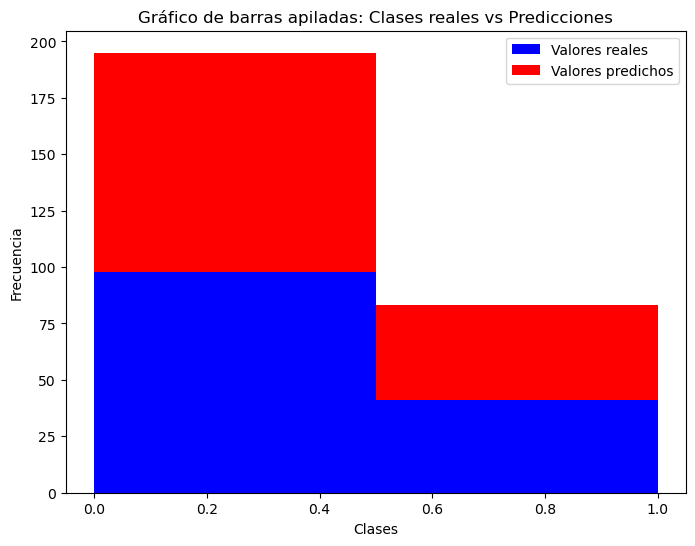

In [42]:
import matplotlib.pyplot as plt

# Asegúrate de que tanto y_test como y_pred sean unidimensionales
y_test = y_test.flatten()
y_pred = y_pred.flatten()

# Crear gráfico de barras apiladas
plt.figure(figsize=(8, 6))
plt.hist([y_test, y_pred], bins=2, stacked=True, color=['blue', 'red'], label=['Valores reales', 'Valores predichos'])
plt.title('Gráfico de barras apiladas: Clases reales vs Predicciones')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


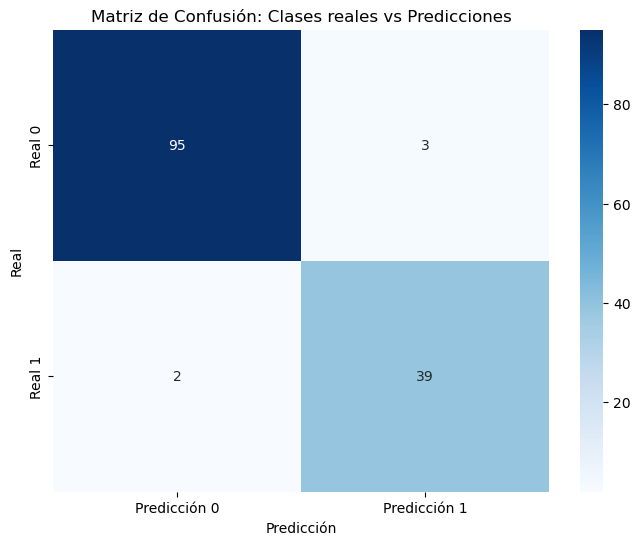

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Asegúrate de que tanto y_test como y_pred sean unidimensionales
y_test = y_test.flatten()
y_pred = y_pred.flatten()

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicción 0', 'Predicción 1'], yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusión: Clases reales vs Predicciones')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


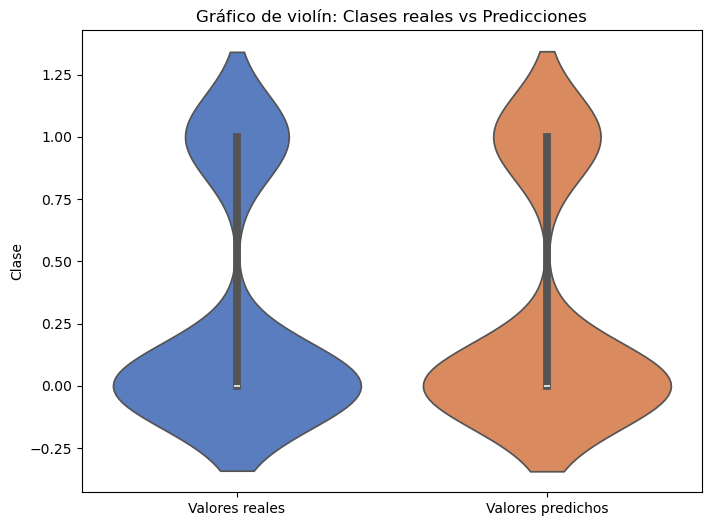

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que tanto y_test como y_pred sean unidimensionales
y_test = y_test.flatten()
y_pred = y_pred.flatten()

# Crear gráfico de violín
plt.figure(figsize=(8, 6))
sns.violinplot(data=[y_test, y_pred], palette="muted")
plt.title('Gráfico de violín: Clases reales vs Predicciones')
plt.ylabel('Clase')
plt.xticks([0, 1], ['Valores reales', 'Valores predichos'])
plt.show()


**Descripcion:**
* El modelo tiene un alto rendimiento en términos de precisión (0.96 de exactitud), especialmente para la clase 0. Si bien tiene un ligero desempeño inferior en la clase 1 (con un F1-Score de 0.94), sigue siendo un modelo sólido. Los gráficos sugeridos ofrecen diferentes maneras de verificar visualmente estos resultados y ayudarán a evaluar el comportamiento del modelo de manera más comprensible.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 691 non-null    float64
 1   clump_thickness    691 non-null    float64
 2   size_uniformity    691 non-null    float64
 3   shape_uniformity   691 non-null    float64
 4   marginal_adhesion  691 non-null    float64
 5   epithelial_size    691 non-null    float64
 6   bare_nucleoli      691 non-null    float64
 7   bland_chromatin    691 non-null    float64
 8   normal_nucleoli    691 non-null    float64
 9   mitoses            691 non-null    float64
 10  class              691 non-null    float64
dtypes: float64(11)
memory usage: 64.8 KB


**Discusión sobre la adecuación de una red MLP para este tipo de datos:**

La red MLP (Multi-Layer Perceptron) es un modelo de aprendizaje profundo que es capaz de aprender representaciones no lineales complejas a partir de datos de entrada. En el caso de tu conjunto de datos, que parece ser un conjunto de características relacionadas con el diagnóstico de cáncer (probablemente un conjunto de datos de cáncer de mama, como el de Wisconsin Breast Cancer Database), una MLP básica podría ser adecuada dependiendo de varios factores:

**1. Características del Conjunto de Datos:**
Estructura de los datos: El conjunto tiene 691 entradas y 11 columnas, de las cuales 10 son características numéricas (como grosor del bulto, uniformidad del tamaño, adhesión marginal, etc.) y 1 es la clase de salida, que es binaria (0 o 1, representando probablemente benigno y maligno).
Las características son numéricas continuas, lo que facilita el uso de una red MLP, ya que este tipo de red puede manejar datos continuos de manera eficiente.
Además, no hay valores faltantes, lo que es importante para la eficacia de los modelos.

**2. Desbalance de Clases:**
La clase 0 (probablemente benigno) tiene una mayor frecuencia de instancias (98), mientras que la clase 1 (probablemente maligno) tiene menos instancias (41). Esto podría crear un desbalance en el modelo y, aunque la red MLP es robusta, podría aprender a predecir mejor la clase mayoritaria (0) y tener dificultades con la clase minoritaria (1).
En tu caso, las métricas de precision, recall y f1-score para la clase 1 (maligno) son razonables, pero podrían mejorarse. El recall de 0.95 indica que el modelo está siendo bastante bueno para identificar los casos malignos, aunque el F1-score es más bajo en comparación con la clase 0 (benigno).

**3. Rendimiento del Modelo MLP:**
Según los resultados obtenidos, la exactitud (accuracy) es de 0.96, lo que indica que el modelo tiene un buen desempeño general. Además, las métricas de precision y recall para la clase 0 son excelentes (0.98 y 0.97), pero las métricas para la clase 1, aunque también son buenas (0.93 y 0.95), son ligeramente inferiores.
El modelo MLP está funcionando bien, pero tiene un margen para mejorar, especialmente en el tratamiento de la clase menos representada (1). Es posible que las predicciones sean sesgadas hacia la clase mayoritaria debido al desbalance de clases.
Mejoras potenciales:
Aunque el modelo MLP está funcionando bien, hay varias formas de mejorar el rendimiento, especialmente para manejar el desbalance de clases:

**1. Reajuste de Hiperparámetros:**

Número de capas y neuronas: Experimentar con el número de capas ocultas y neuronas en cada capa. A veces, una red más profunda o con más neuronas puede mejorar la capacidad del modelo para aprender patrones complejos.
Función de activación: Cambiar las funciones de activación de las capas ocultas (por ejemplo, usar ReLU o Leaky ReLU) podría mejorar el aprendizaje.
**2. Manejo del Desbalance de Clases:**

**Técnicas de sobremuestreo y submuestreo:** Utilizar técnicas como SMOTE (Synthetic Minority Over-sampling Technique) para aumentar el número de muestras de la clase minoritaria (1), o bien hacer submuestreo de la clase mayoritaria (0).

**Pesos de clase:** Ajustar los pesos de clase en el modelo, para penalizar más fuertemente los errores en la clase minoritaria (1), lo que podría ayudar al modelo a concentrarse más en la clase 1.

**3. Regularización:**

La regularización L2 (o weight decay) podría ayudar a evitar que el modelo se sobreajuste (overfitting) a los datos de entrenamiento, especialmente si el modelo tiene demasiados parámetros.

**4. Entrenamiento con más datos:**

Si es posible, obtener más datos para la clase minoritaria (1) podría ayudar a equilibrar el conjunto de datos y mejorar la capacidad del modelo para aprender patrones de ambas clases.

**5. Uso de Modelos Alternativos:**

Modelos de Ensemble: Los árboles de decisión o Random Forest pueden ser más eficaces para manejar desbalances de clases.
Modelos basados en XGBoost o LightGBM: Estos modelos, aunque no son redes neuronales, a menudo tienen un buen desempeño en conjuntos de datos estructurados y desbalanceados.

Redes neuronales avanzadas: Modelos como Redes Neuronales Convolucionales (CNN) o Redes Neuronales Recurrentes (RNN) podrían no ser tan necesarios en este caso, ya que las características son simples, pero podrían explorarse si se desea mejorar aún más el rendimiento.

**6. Ajuste de umbral de decisión:**

En lugar de utilizar un umbral fijo de 0.5 para clasificar las predicciones en 0 o 1, se podría ajustar este umbral según la precision y recall para optimizar los resultados para la clase minoritaria.

**Conclusión:**

La MLP básica es adecuada para este tipo de datos y muestra un buen desempeño en términos de precisión y recall, pero presenta un pequeño sesgo hacia la clase mayoritaria debido al desbalance de clases. Se pueden aplicar técnicas como el ajuste de pesos de clase, sobremuestreo de la clase minoritaria o el ajuste de hiperparámetros para mejorar aún más el rendimiento, especialmente en la predicción de la clase 1 (maligno). Experimentar con modelos alternativos también podría ser una buena opción para mejorar la clasificación en estos tipos de datos desbalanceados.